### Support Vector Machines (SVM) Classification

Support Vector Machines(SVMs) is a classification model that finds the best hyperplane as a decision boundary in order to linearly separate 2 classes/groups(binary).

A hyperplane is a 1-dimension subspace for an N-dimensional space.

Support Vectors refer to samples(data points) that are located nearest to the separating hyperlanes or that lie on the margins.

The distance between the hyperplane and the nearest data points(samples) is called the SVM margin.

Goal: To choose a hyperplane with the widest possible margin between the hyperplane and any support vector. The wider the margin between the two categories, the better the model will be at predicting the category for new records.

 SVMs pick the decision boundary that maximizes the distance to the support vectors. The decision boundary is drawn in a way that the distance to support vectors are maximized. If the decision boundary is too close to the support vectors then, it will be sensitive to noise and not generalize well.

Soft margin: Allows some samples to be misclassified or be on the wrong side of the decision boundary allowing highly generalized model.
A soft margin SVM solves the following optimization problem:
1.Increase the distance of decision boundary to the support vectors (i.e. the margin) and
2.Maximize the number of points that are correctly classified in the training set.

C : If C is small, the penalty for misclassified data points is low, so a decision boundary with a large margin is chosen at the expese of a greater number of misclassifications.
If C is large, SVM tries to minimize the number of misclassified samples and results in a decision boundary with a smaller margin.

If dataset is NOT linearly separable, then we need to apply Kernel trick.
The kernel trick projects the original data points in a higher dimensional space in order to make them linearly separable.
The kernel-SVM computes the decision boundary in terms of similarity measures in a high-dimensional feature space without actually doing the projection. Some famous kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid kernels.








#notebook
https://www.kaggle.com/prashant111/svm-classifier-tutorial
https://medium.com/mlearning-ai/support-vector-machines-svm-clearly-explained-a-python-tutorial-for-classification-problems-with-f373a3b439ab

Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,hinge_loss,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

In [3]:
df= pd.read_csv('/users/kunalramchurn/Desktop/all scripts/data/loan_data.csv')
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [4]:
print('Presence of missing values:\n',df.isnull().any())

Presence of missing values:
 credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool


Class Imbalance

Paid 83.99 % of the dataset
Not paid 16.01 % of the dataset


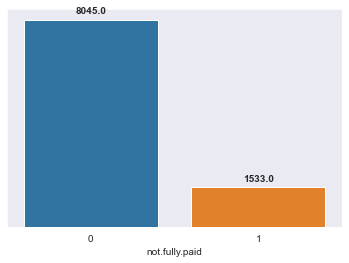

In [5]:
ax=sns.countplot(df['not.fully.paid']);
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',weight='bold')
ax.axes.yaxis.set_visible(False)
print('Paid', round(df['not.fully.paid'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Not paid', round(df['not.fully.paid'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

There is presence of heavy class imbalance for the target variable. Further below, we will use oversampling technique to balance both classes.

EDA

Feature Scaling, Engineering and Selection

In [6]:
labelencoder= LabelEncoder()
df['Purpose en']=labelencoder.fit_transform(df.purpose)

In [7]:
X=df.drop(['not.fully.paid','purpose'],axis=1)
#X=[[ 'days.with.cr.line', 'revol.bal', 'revol.util']]
y= df["not.fully.paid"]

In [8]:
from sklearn.feature_selection import SelectKBest,chi2
chi2_features = SelectKBest(chi2, k = 4) 
X_kbest_features = chi2_features.fit_transform(X, y)
mask=chi2_features.get_support()
new_feature=[]
for bool,feature in zip(mask,X.columns):
  if bool:
    new_feature.append(feature)
list3=new_feature
list3

['installment', 'days.with.cr.line', 'revol.bal', 'revol.util']

In [9]:
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.25,random_state=42)

In [10]:
sm = SMOTE(random_state=42)
smx_train, smy_train = sm.fit_resample(X_train, y_train)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_train.shape}''')

Shape of X before SMOTE: (9578, 13)
Shape of X after SMOTE: (7183, 13)


Model Deployment

In [11]:
#hyperparameter tuning missing

In [12]:
classifier = SVC(C=0.01,kernel ='linear',random_state=1)
classifier.fit(smx_train,smy_train)

SVC(C=0.01, kernel='linear', random_state=1)

Model Evaluation

In [13]:
y_pred= classifier.predict(X_test)
print('accuracy score on training set: {:.2f}%'.format(classifier.score(X_train,y_train)*100))
print('accuracy score on testing set: {:.2f}%'.format(accuracy_score(y_test,y_pred) *100))

accuracy score on training set: 64.68%
accuracy score on testing set: 64.01%


In [14]:
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[1304  708]
 [ 154  229]]


In [15]:
print('Classification Report:\n',classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.65      0.75      2012
           1       0.24      0.60      0.35       383

    accuracy                           0.64      2395
   macro avg       0.57      0.62      0.55      2395
weighted avg       0.79      0.64      0.69      2395



The hinge loss is a loss function used for binary classificaation to compute the average distance between the model and the data.

In [20]:
print('Hinge Loss of SVM classifier: {:.2f}'.format(hinge_loss(y_test,y_pred)))

Hinge Loss of SVM classifier: 1.20


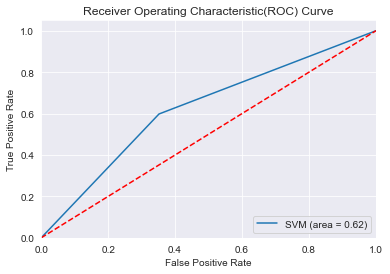

In [16]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Model Interpretation